# Q-11

# Виды модуляции сигнала.

![title](2.png)

# ASK-幅移键控

We literally modulate the amplitude of the carrier. Here is an example of 2-level ASK, called 2-ASK:

![title](3.png)

Below shows an example of 4-ASK. In this case each symbol carries 2 bits of information.

![title](4.png)

All we have to do is create a vector with N samples per symbol, then multiply that vector by a sinusoid. This modulates the signal onto a carrier (the sinusoid acts as that carrier). The example below shows 2-ASK with 10 samples per symbol.The example below shows 2-ASK with 10 samples per symbol.
如何以数字方式通过代码创建此信号？
为每个符号创建有N个样本的向量，然后将这些向量乘以一个正弦波。这会将信号调制到载波上(正弦波)。下面的示例为2-ASK，每个符号有10个样本。

![title](5.png)

In this example there are only three cycles of the sinusoid in each symbol, but in practice there may be thousands, depending on how high in the spectrum the signal is being transmitted.
示例中每个符号有三个正弦波周期，实例中可能有数千个，这取决于信号传输的频谱有多高。

# PSK(相移键控)

Now let’s consider modulating the phase in a similar manner as we did with the amplitude. The simplest form is Binary PSK, a.k.a. BPSK, where there are two levels of phase:

1.No phase change     

2.180 degree phase change

![title](6.png)

For a given symbol, we can show the amplitude and phase on an IQ plot. For the BPSK example we said we had phases of 0 and 180 degrees. Let’s plot those two points on the IQ plot.

![title](7.png)

The above IQ plot shows what we will transmit, or rather the set of symbols we will transmit from. It does not show the carrier, so you can think about it as representing the symbols at baseband. When we show the set of possible symbols for a given modulation scheme, we call it the “constellation”. Many modulation schemes can be defined by their constellation.

Back to PSK. What if we want four different levels of phase? I.e., 0, 90, 180, and 270 degrees. In this case it would be represented like so on the IQ plot, and it forms a modulation scheme we call Quadrature Phase Shift Keying (QPSK):

![title](8.png)

For PSK we always have N different phases, equally spaced around 360 degrees for best results. We often show the unit circle to emphasize that all points have the same magnitude:

![title](9.png)

Let’s detour back to ASK for a moment. Note that we can show ASK on the IQ plot just like PSK. Here is the IQ plot of 2-ASK, 4-ASK, and 8-ASK, in the bipolar configuration, as well as 2-ASK and 4-ASK in the unipolar configuration.



![title](10.png)

As you may have noticed, bipolar 2-ASK and BPSK are the same. A 180 degree phase shift is the same as multiplying the sinusoid by -1. We call it BPSK, probably because PSK is used way more than ASK.
您可能已经注意到，双极 2-ASK 和 BPSK 是相同的。180 度相移与将正弦波乘以 -1 相同。我们称它为 BPSK，可能是因为 PSK 的使用方式比 ASK 多。

As a short Python example, let’s generate QPSK at baseband and plot the constellation.
We will use 45, 135, 225, and 315 degrees for our points. First we will generate random numbers between 0 and 3 and perform math to get the degrees we want before converting to radians.
我们将使用 45、135、225 和 315 度作为我们的点。首先，我们将生成 0 到 3 之间的随机数，并在转换为弧度之前执行数学运算以获得我们想要的度数。

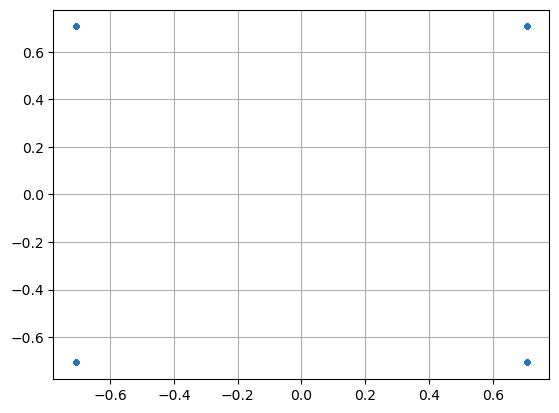

In [18]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

Let’s add some noise:添加噪音

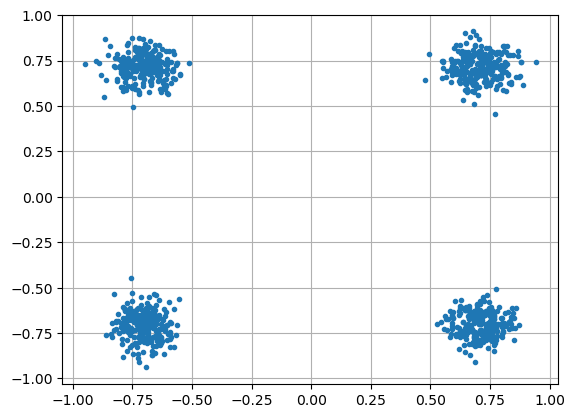

In [19]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

Consider how additive white Gaussian noise (AGWN) produces a uniform spread around each point in the constellation. If there’s too much noise then symbols start passing the boundary (the four quadrants) and will be interpreted by the receiver as an incorrect symbol. Try increasing noise_power until that happens.
考虑加性高斯白噪声 (AGWN) 如何在星座中的每个点周围产生均匀分布。如果噪声太大，则符号开始通过边界（四个象限），并且将被接收器解释为不正确的符号。尝试增加noise_power直到发生这种情况

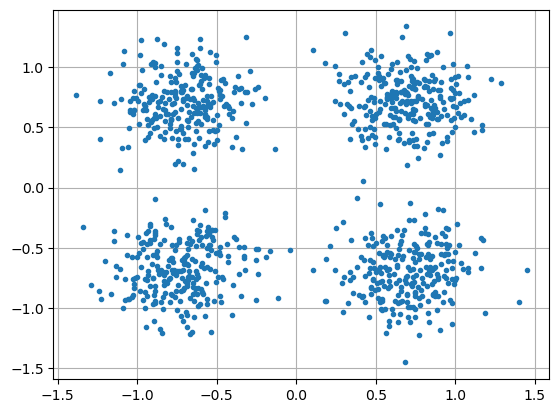

In [20]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.1
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

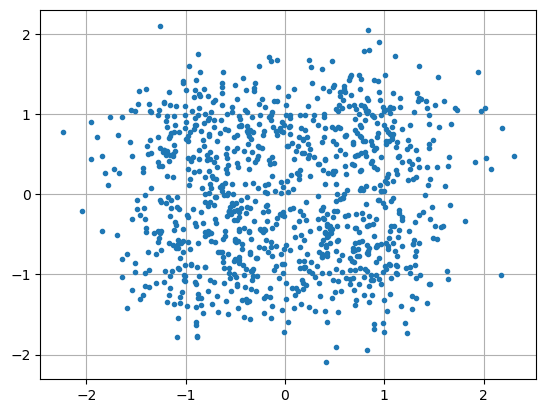

In [21]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.5
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

For those interested in simulating phase noise, which could result from phase jitter within the local oscillator (LO), replace the r with:
本地振荡器(Локальный генератор)引起相位抖动产生相位噪声

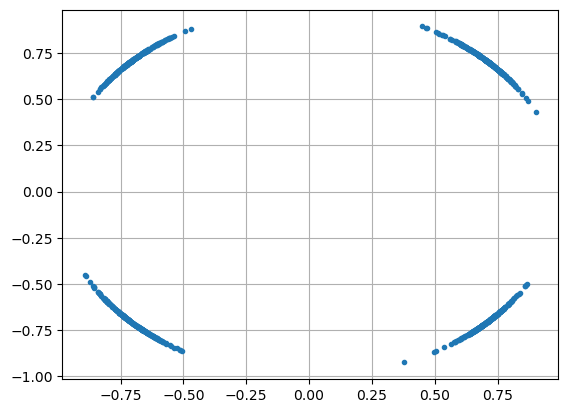

In [22]:
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

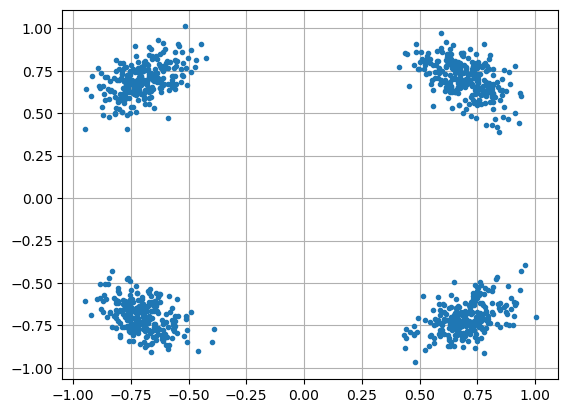

In [23]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise)+ n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

# QAM

What if we combine ASK and PSK? We call this modulation scheme Quadrature Amplitude Modulation (QAM). QAM usually looks something like this:如果我们结合 ASK 和 PSK 会怎样？我们称此调制方案为正交调幅 (QAM)

![title](QAM1.png)

Here are some other examples of QAM:

![title](QAM2.png)

For a QAM modulation scheme, we can technically put points wherever we want to on the IQ plot since the phase and amplitude are modulated. The “parameters” of a given QAM scheme are best defined by showing the QAM constellation. Alternatively, you may list the I and Q values for each point, like below for QPSK:

![title](QAM3.png)

![title](QAM4.png)

![title](QAM5.png)

![title](QAM6.png)

![title](QAM7.png)

![title](QAM8.png)

![title](QAM9.png)


# Квадратурная модуляция сигнала (QM)正交调制

The block diagram for a general QAM multiplexing communnication system is therefore:

![title](1.png)

![title](QM.png)

如果theta不等于0，则输出端得到混合信号。
除非接受设备的振荡器保证同相，或解调后支持一个相位旋转，否则该方法不能传输两个独立序列。

![title](QM1.png)

![title](QM2.png)

![title](QM3.png)

![title](QM4.png)

![title](QM5.png)

![title](QM6.png)

只是模型，所有信号和组件都真实，用于处理真实电压

# QM Vs Complex QM

![title](QM7.png)